In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [3]:
# Loading the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Selecting 'Annual Income' and 'Spending Score' column for clustering

In [12]:
x = df.iloc[:,[3,4]].values

Selecting the number of clusters

Using 'WCSS' -> Within clusters sum of squares

In [15]:
# Elbow method
# Finding WCSS value for different clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

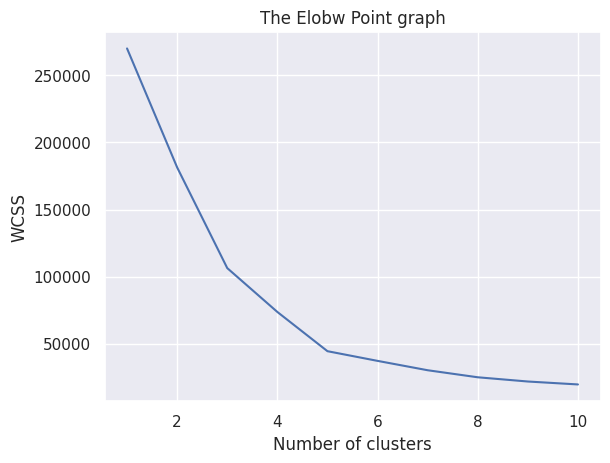

In [16]:
# Elbow graph
sns.set()

plt.plot(range(1,11), wcss)
plt.title('The Elobw Point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of clusters will be 5, as in the graph, after point '5', there is no significant elbow point, or any drop in the values after point '5'

Training the KMeans Clustering Model

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point, based on their clusters
y = kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 clusters -> 0, 1, 2, 3, 4

Visualizing all the clusters

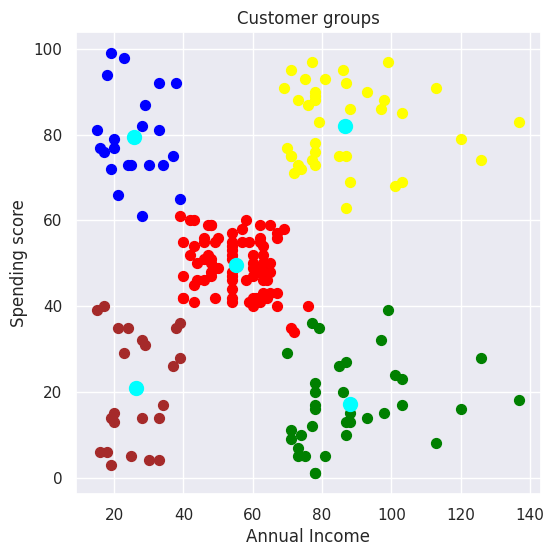

In [18]:
# plotting all the clusters and their centroids

plt.figure(figsize = (6,6))
# x[y==0,0] signifies - I want the first cluster('0') from the first column ('0')
# x[y==1,0] signifies - I want the second cluster('1') from the first column ('0')
# x[y==0,1] signifies - I want the first cluster('0') from the second column ('1')
# x[y==1,1] signifies - I want the second cluster('1') from the second column ('1')
# 'c' represents the 'color'
# 's' represents the 'size'
plt.scatter(x[y==0,0], x[y==0,1], s = 50, c = 'green', label = 'cluster_1')
plt.scatter(x[y==1,0], x[y==1,1], s = 50, c = 'red', label = 'cluster_2')
plt.scatter(x[y==2,0], x[y==2,1], s = 50, c = 'yellow', label = 'cluster_3')
plt.scatter(x[y==3,0], x[y==3,1], s = 50, c = 'blue', label = 'cluster_4')
plt.scatter(x[y==4,0], x[y==4,1], s = 50, c = 'brown', label = 'cluster_5')

# Plotting the centroids
# kmeans.cluster_centers_[:,0] is the x-axis of the centroid point
# kmeans.cluster_centers_[:,1] is the y-axis of the centroid point
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c='cyan', label = 'Centroid')

plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

Outcome -> The people in green cluster needs to be targetted the most, as they have a good income, but are not spending that much

**Thank You**